In [1]:
import pandas as pd
import numpy as np

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [7]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [16]:
test_df = pd.read_csv('C:\\mehdi dossier\\Cours Master Org M1-S2\\Formation_Orange\\TitanicProjet\\test.csv')
train_df = pd.read_csv('C:\\mehdi dossier\\Cours Master Org M1-S2\\Formation_Orange\\TitanicProjet\\train.csv')

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [19]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
total = train_df.isnull().sum().sort_values(ascending=False)

In [42]:
total_all = train_df.isnull().count().sort_values(ascending=False)

In [43]:
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100

In [44]:
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

In [45]:
missing_values = pd.concat([total_all,total, percent_2], axis=1, keys=['Total all', 'Total', '%'])

In [46]:
missing_values.head(10)

,Total all,Total,%
PassengerId,891,0,0.0
Survived,891,0,0.0
Pclass,891,0,0.0
Name,891,0,0.0
Sex,891,0,0.0
Age,891,177,19.9
SibSp,891,0,0.0
Parch,891,0,0.0
Ticket,891,0,0.0
Fare,891,0,0.0


In [48]:
train_df.loc[train_df.Embarked.isnull(), 'Embarked'] = 'C'

In [49]:
train_df.Survived.mean()

0.3838383838383838

In [50]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
""""
fig, axe = plt.subplot(nrows=1, ncols=2,figsize=(15, 5))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
""""

<AxesSubplot:xlabel='Age', ylabel='Density'>

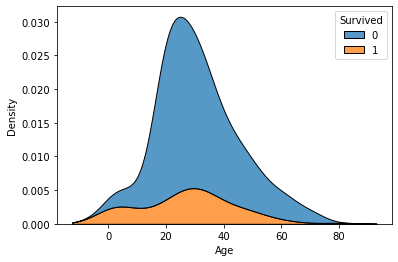

In [55]:
sns.kdeplot(data=train_df.query('Sex=="male"'), x="Age", hue="Survived", multiple="stack")

<AxesSubplot:xlabel='Age', ylabel='Density'>

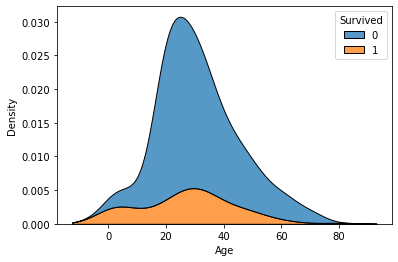

In [56]:
sns.kdeplot(data=train_df.loc[train_df.Sex=="male"], x="Age", hue="Survived", multiple="stack")

In [60]:
train_df.groupby(['Sex']).Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [64]:
train_df.groupby(['Sex','Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [70]:
from scipy.stats import ttest_1samp
tset, pval = ttest_1samp(train_df.Survived, 0)
print('p-values',pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values 1.1178557329333008e-95
 we are rejecting null hypothesis


In [76]:
def survive_predict(sex,pclass):
    if sex=='female':
        if pclass in [1, 2]:
            return "survived"
    if sex=='male':
        if pclass in [2, 3]:
            return "not survived"
    return "not survived"
survive_predict('female',1)

'survived'

In [77]:
def get_title(name):
    return name.split(', ')[1].split('.')[0]
for name in train_df.head(6).Name:
    print(get_title(name))

Mr
Mrs
Miss
Mrs
Mr
Mr


In [157]:
train_df['title'] = train_df.apply(lambda x:get_title(x.Name),axis=1)
train_df['title'] 

In [91]:
train_df['has_cabin'] = 1
train_df.loc[train_df.Cabin.isnull(), 'has_cabin'] = 0

In [93]:
train_df['has_cabin'].head()

0    0
1    1
2    0
3    1
4    0
Name: has_cabin, dtype: int64

In [97]:
train_df.groupby(['has_cabin']).Survived.mean()


has_cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

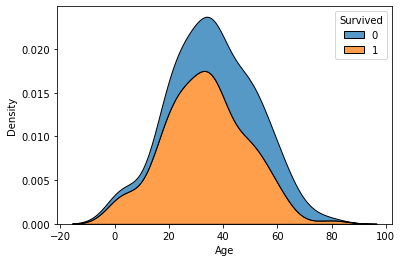

In [104]:
sns.kdeplot(data=train_df.loc[train_df.has_cabin==1], x="Age", hue="Survived", multiple="stack")

<AxesSubplot:xlabel='Age', ylabel='Density'>

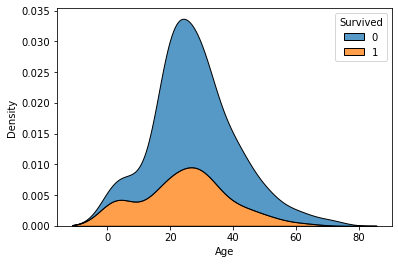

In [105]:
sns.kdeplot(data=train_df.loc[train_df.has_cabin==0], x="Age", hue="Survived", multiple="stack")

<AxesSubplot:>

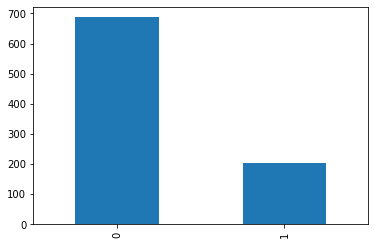

In [106]:
train_df['has_cabin'].value_counts().plot(kind='bar')

C:\Users\LGHAOUCH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='has_cabin', ylabel='count'>

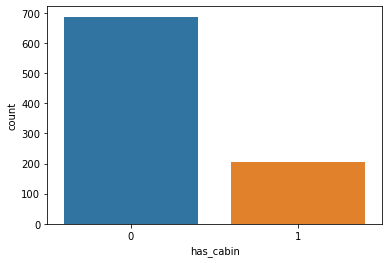

In [107]:
sns.countplot('has_cabin', data = train_df)

In [89]:
train_df['title'] = train_df.apply(lambda x: get_title(x.Name), axis=1)

In [90]:
train_df.groupby(['title']).Survived.mean()

title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64

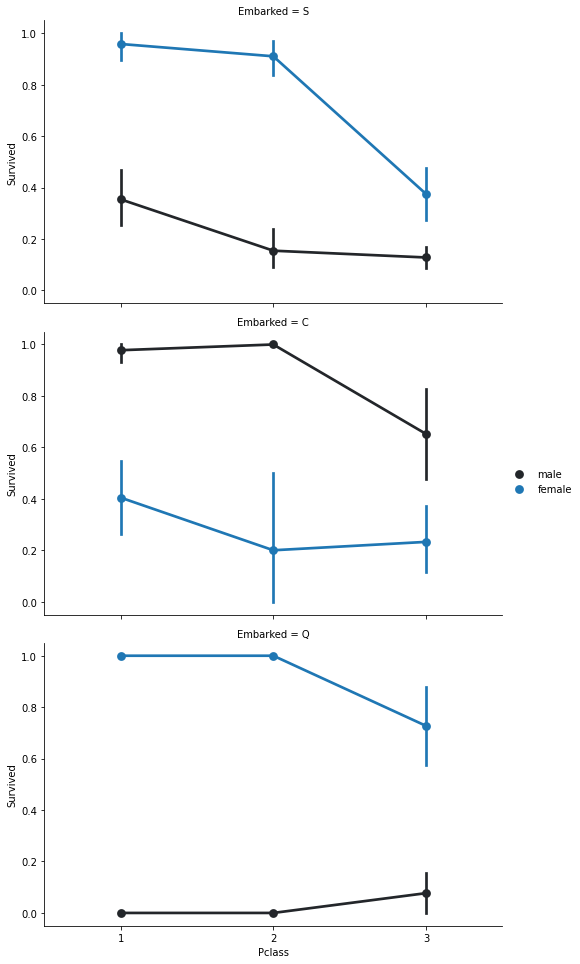

In [112]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

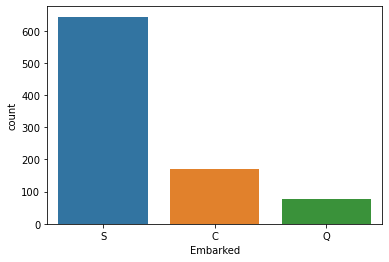

In [115]:
sns.countplot('Embarked', data = train_df)

In [116]:
ticket_groupe = train_df.groupby(['Ticket']).agg({'PassengerId':'count'}).reset_index()

In [118]:
train_df = train_df.merge(ticket_groupe, left_on='Ticket', right_on='Ticket')

In [126]:
train_df['Fare_sd'] = train_df['Fare'] / train_df['PassengerId_y']

In [127]:
train_df['log_Fare_sd'] = np.log(1 + train_df['Fare_sd'])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

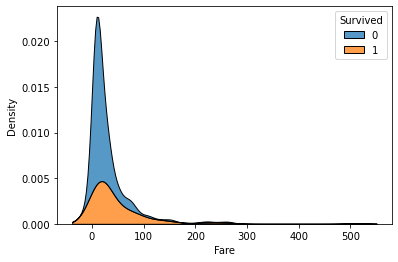

In [128]:
sns.kdeplot(data=train_df, x="Fare", hue="Survived", multiple="stack")

<AxesSubplot:xlabel='Fare_sd', ylabel='Density'>

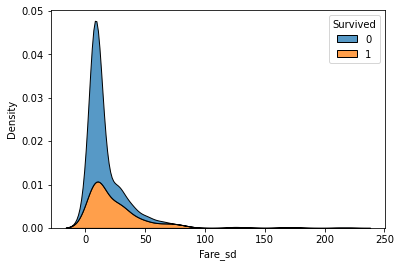

In [129]:
sns.kdeplot(data=train_df, x="Fare_sd", hue="Survived", multiple="stack")

<AxesSubplot:xlabel='log_Fare_sd', ylabel='Density'>

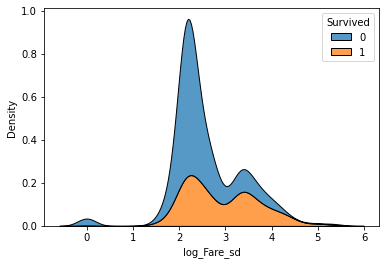

In [130]:
sns.kdeplot(data=train_df, x="log_Fare_sd", hue="Survived", multiple="stack")

In [131]:
train_df['free_ticket'] = (train_df['Fare']==0).astype(int)

In [133]:
train_df.groupby(['free_ticket','Sex']).agg({'Survived':['mean','count']})

Survived      
                        mean count
free_ticket Sex                   
0           female  0.742038   314
            male    0.192171   562
1           male    0.066667    15

In [141]:
train_df['family_size'] = train_df['SibSp'] + train_df['Parch'] + 1

In [142]:
train_df['is_alone'] = (train_df['family_size']==1).astype(int)

In [143]:
train_df.groupby(['is_alone']).Survived.mean()

is_alone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

In [144]:
train_df.groupby(['is_alone','Pclass']).agg({'Survived':['mean']})

Survived
                     mean
is_alone Pclass          
0        1       0.728972
         2       0.637500
         3       0.299401
1        1       0.532110
         2       0.346154
         3       0.212963

In [145]:
train_df.groupby(['is_alone','Sex']).agg({'Survived':['mean','count']})

Survived      
                     mean count
is_alone Sex                   
0        female  0.712766   188
         male    0.271084   166
1        female  0.785714   126
         male    0.155718   411

In [146]:
train_df.groupby(['family_size']).agg({'Survived':['mean','count']})

Survived      
                 mean count
family_size                
1            0.303538   537
2            0.552795   161
3            0.578431   102
4            0.724138    29
5            0.200000    15
6            0.136364    22
7            0.333333    12
8            0.000000     6
11           0.000000     7

<AxesSubplot:xlabel='family_size', ylabel='Survived'>

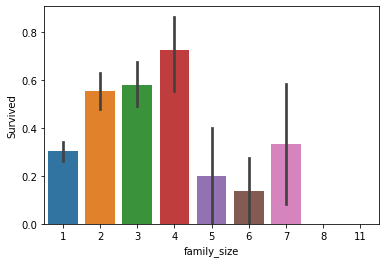

In [150]:
sns.barplot(x='family_size', y='Survived', data=train_df)

In [151]:
def get_family_class(s):
    if s == 1:
        return 'alone'
    elif s<=4:
        return 'medium'
    else:
        return 'large'

In [153]:
train_df['family_class'] = train_df.apply(lambda x: get_family_class(x.family_size), axis=1)

<AxesSubplot:xlabel='family_class', ylabel='Survived'>

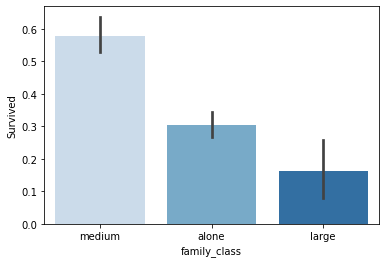

In [155]:
sns.barplot(x='family_class', y='Survived', data=train_df, palette='Blues')

<AxesSubplot:xlabel='title', ylabel='Survived'>

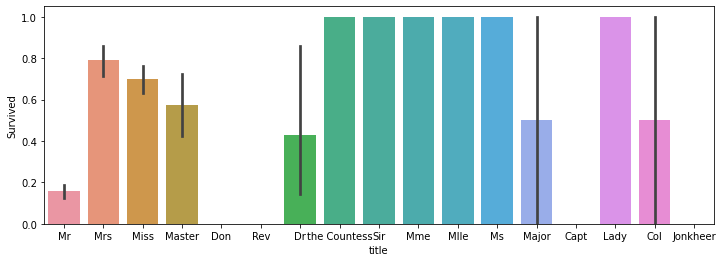

In [159]:
plt.figure(figsize=(12,4))
sns.barplot(x='title', y='Survived', data=train_df)

In [161]:
train_df.groupby(['title']).agg({'Age':['mean','count']})

Age      
                   mean count
title                        
Capt          70.000000     1
Col           58.000000     2
Don           40.000000     1
Dr            42.000000     6
Jonkheer      38.000000     1
Lady          48.000000     1
Major         48.500000     2
Master         4.574167    36
Miss          21.773973   146
Mlle          24.000000     2
Mme           24.000000     1
Mr            32.368090   398
Mrs           35.898148   108
Ms            28.000000     1
Rev           43.166667     6
Sir           49.000000     1
the Countess  33.000000     1

In [163]:
train_df['title'] = train_df['title'].replace(['Countess','Capt', 'Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
train_df['title'] = train_df['title'].replace(['Mlle','Lady'], 'Miss')
train_df['title'] = train_df['title'].replace('Ms', 'Miss')
train_df['title'] = train_df['title'].replace('Mme', 'Mrs')

In [164]:
train_df.Cabin

0       NaN
1       C85
2       NaN
3      C123
4      C123
       ... 
886     NaN
887     NaN
888     B42
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [165]:
train_df.Cabin.fillna('Unknown', inplace=True)

In [166]:
train_df['Deck'] = train_df.apply(lambda x: x.Cabin[0], axis=1)

In [170]:
train_df.groupby(['Deck','Pclass']).agg({'Survived' : ['mean','count']})

Survived      
                 mean count
Deck Pclass                
A    1       0.466667    15
B    1       0.744681    47
C    1       0.593220    59
D    1       0.758621    29
     2       0.750000     4
E    1       0.720000    25
     2       0.750000     4
     3       1.000000     3
F    2       0.875000     8
     3       0.200000     5
G    3       0.500000     4
T    1       0.000000     1
U    1       0.475000    40
     2       0.440476   168
     3       0.235908   479

In [174]:
train_df.query('Age<1')

,PassengerId_x,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,title,has_cabin,PassengerId_y,Fare_sd,log_Fare_sd,free_ticket,family_size,is_alone,family_class,Deck
142,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,...,Master,0,2,14.500000,2.740840,0,3,0,medium,U
341,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,...,Master,0,2,7.250000,2.110213,0,3,0,medium,U
411,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,...,Master,1,4,37.887500,3.660673,0,4,0,medium,C
523,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,...,Master,0,3,6.250000,1.981001,0,3,0,medium,U
561,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,...,Miss,0,4,4.814575,1.760368,0,4,0,medium,U
562,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,...,Miss,0,4,4.814575,1.760368,0,4,0,medium,U
834,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,...,Master,0,1,8.516700,2.253048,0,2,0,medium,U


<AxesSubplot:xlabel='Age'>

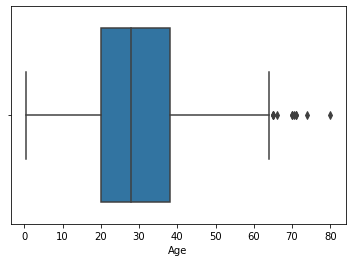

In [175]:
sns.boxplot(x='Age', data=train_df)

In [188]:
impute_age = train_df.groupby(['title','Pclass']).agg({'Age':'median'}).reset_index()

In [192]:
def get_impute_age(title,pclass):
    return impute_age.query('title=="{0}" and Pclass=={1}'.format(title,pclass)).iloc[0]['Age']

In [190]:
get_impute_age('Master',1)

4.0

In [194]:
train_df['Age_impute'] = train_df.apply(lambda x: get_impute_age(x.title,x.Pclass), axis=1)

In [195]:
train_df['Age_impute'] = train_df.apply(lambda x: get_impute_age(x.title,x.Pclass) if pd.isna(x.Age) else x.Age ,axis=1)

In [196]:
train_df.Age_impute.describe()

count    891.000000
mean      29.135993
std       13.491701
min        0.420000
25%       21.000000
50%       26.000000
75%       36.750000
max       80.000000
Name: Age_impute, dtype: float64

In [197]:
train_df['age_group'] = 'group1'
train_df.loc[train_df.Age_impute > 21, 'age_group'] = 'group2'
train_df.loc[train_df.Age_impute > 26, 'age_group'] = 'group3'
train_df.loc[train_df.Age_impute > 36, 'age_group'] = 'group4'

<AxesSubplot:xlabel='age_group', ylabel='Survived'>

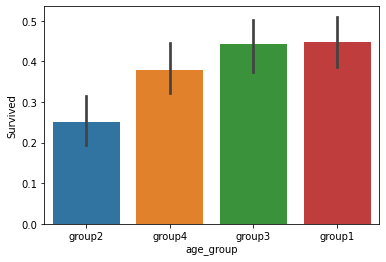

In [198]:
sns.barplot(x='age_group', y='Survived', data=train_df)

<AxesSubplot:xlabel='Age_impute', ylabel='Density'>

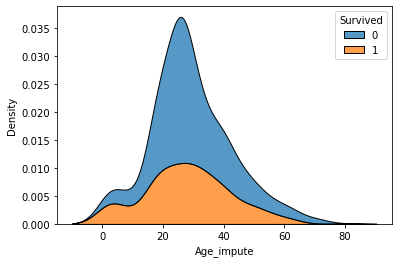

In [199]:
sns.kdeplot(x='Age_impute', data=train_df, hue='Survived', multiple='stack')

In [202]:
train_df.loc[train_df.Age_impute <=10, 'age_group_mod'] = 'mod1'
train_df.loc[train_df.Age_impute >=40, 'age_group_mod'] = 'mod2'
train_df.loc[train_df.Age_impute <=40, 'age_group_mod'] = 'mod3'

<AxesSubplot:xlabel='age_group_mod', ylabel='Survived'>

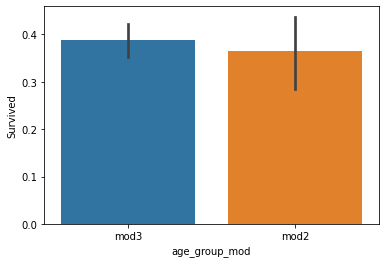

In [203]:
sns.barplot(x='age_group_mod', y='Survived', data=train_df)

In [205]:
train_df.loc[train_df.log_Fare_sd > 3 ,'Fare_group'] = 'high'
train_df.loc[train_df.log_Fare_sd <= 3 ,'Fare_group'] = 'low'
train_df.loc[train_df.log_Fare_sd == 0 ,'Fare_group'] = 'free'

In [219]:
predictors = ['age_group_mod','age_group','title','Sex','Pclass','has_cabin','Deck','family_class','is_alone','Embarked','free_ticket','Fare_group']

In [224]:
X, y = pd.get_dummies(train_df[predictors]), train_df['Survived']
X.head()

,Pclass,has_cabin,is_alone,free_ticket,age_group_mod_mod2,age_group_mod_mod3,age_group_group1,age_group_group2,age_group_group3,age_group_group4,...,Deck_U,family_class_alone,family_class_large,family_class_medium,Embarked_C,Embarked_Q,Embarked_S,Fare_group_free,Fare_group_high,Fare_group_low
0,3,0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
1,1,1,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,1,0
2,3,0,1,0,0,1,0,1,0,0,...,1,1,0,0,0,0,1,0,0,1
3,1,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
4,1,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [227]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [228]:
from sklearn.metrics import accuracy_score

In [230]:
accuracy_score(y_test, model.predict(X_test))

0.8212290502793296

In [231]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
accuracy_score(y_test, model.predict(X_test))

0.8491620111731844